# Raised Cosine filter

In [1]:
using Plots

In [2]:
# Function to generate the Root-Raised Cosine (RRC) filter impulse response
function rrc_filter(T::Float64, β::Float64, num_samples::Int, span::Int)
    """
    T: Symbol period (in seconds)
    β: Roll-off factor (0 ≤ β ≤ 1)
    num_samples: Number of samples per symbol (oversampling factor)
    span: Number of symbol durations to include in the filter (filter length)
    """
    t = range(-span/2*T, span/2*T, length=num_samples*span+1)
    h_rrc = zeros(Float64, length(t))

    for i in 1:length(t)
        t_val = t[i]

        if abs(t_val) < 1e-10
            # Special case to avoid division by zero
            h_rrc[i] = 1 / T * (1 + β * (4 / π - 1))
        elseif abs(abs(t_val) - T/(4*β)) < 1e-10
            # Special case for t = ±T/4β
            h_rrc[i] = (β / (T * sqrt(2))) * ((1 + 2/π) * sin(π/(4*β)) + (1 - 2/π) * cos(π/(4*β)))
        else
            numerator = sin(π * t_val / T * (1 - β)) + 4 * β * t_val / T * cos(π * t_val / T * (1 + β))
            denominator = π * t_val / T * (1 - (4 * β * t_val / T)^2)
            h_rrc[i] = numerator / denominator
        end
    end

    return h_rrc, t
end

rrc_filter (generic function with 1 method)

In [3]:

# Parameters for the RRC filter
T = 1.0        # Symbol period (e.g., 1 second for simplicity)
β = 0.5        # Roll-off factor (between 0 and 1)
num_samples = 8  # Number of samples per symbol (oversampling)
span = 6       # Number of symbols to span in filter length

# Generate the RRC filter impulse response
h_rrc, t = rrc_filter(T, β, num_samples, span);

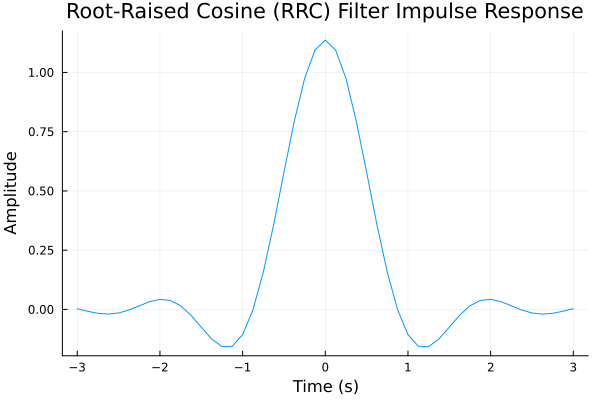

In [4]:
# Plot the impulse response of the RRC filter
plot(t, h_rrc
    , title="Root-Raised Cosine (RRC) Filter Impulse Response"
    , xlabel="Time (s)", ylabel="Amplitude"
    , legend=false
)